In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from glob import glob
from configs import *
from tqdm import tqdm
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from dataset import *
from time import time
tqdm.monitor_interval = 0
import torch
import json
import torch.nn as nn
import numpy as np
torch.manual_seed(0)
torch.cuda.manual_seed(0)
np.random.seed(0)

In [3]:
with open('data/tops.txt') as fl:
    roots = fl.read().split('\n')

In [4]:
print(roots[0], roots[-1])
print(len(roots))

505233-501414 504989-502257
100


In [16]:
with open('data/segment-graph-xclude/segmentgraph-successors.csv') as fl:
    lines = fl.read().split('\n')
nstops = {}
for ln in lines:
    if '\t' in ln:
        start, end = ln.split('\t')
        if end:
            ends = end.split(',')
        else:
            ends = []
    nstops[start] = ends
print(len(nstops))

16728


In [39]:
with open('data/valid_counts.txt') as fl:
    lines = fl.read().split('\n')[1:-1]
valids = {}
for ln in lines:
    stop, count = ln.split(',')
    valids[stop] = int(count)
print(len(valids))

16728


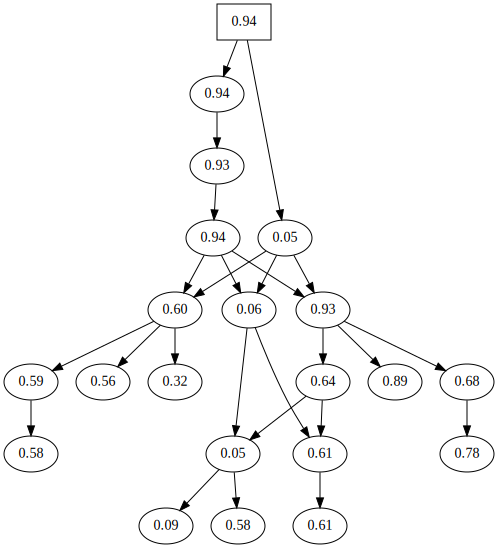

In [235]:
def build_graph(root, depth=10):
    vs = [root]
    adj = {}
    adj[root] = []
    
    if depth > 1:
        for child in nstops[root]:
            
            cvs, cadj = build_graph(child, depth-1)
            vs += cvs
            
            for stop, ls in cadj.items():
                if stop not in adj:
                    adj[stop] = []
                for ent in ls:
                    if ent not in adj[stop]:
                        adj[stop].append(ent)
                
#             adj[child].append(root)
            adj[root].append(child)
        
    return vs, adj

vs, adj = build_graph(roots[0], depth=5)

show_f = lambda vs, adj : show_graph(vs, adj, vdesc=lambda vert: ('%.2f' % (valids[vert]/13248)))
show_f(vs, adj)

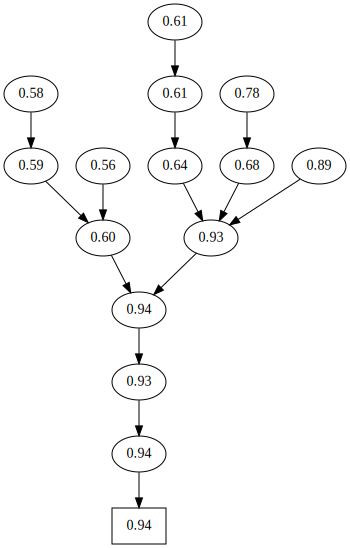

In [251]:
from utils import *
valid = lambda vert: valids[vert] / 13248

vs, adj = build_graph(roots[0], depth=5)
vs, adj = prune_graph(vs, adj, valid)
vs, adj = rev_graph(vs, adj)
show_f(vs, adj)

WARN: # verts did not increase[2]: 902087-902080
WARN: # verts did not increase[3]: 902087-902080
WARN: # verts did not increase[4]: 902087-902080
WARN: # verts did not increase[5]: 902087-902080
WARN: # verts did not increase[6]: 902087-902080
WARN: # verts did not increase[7]: 902087-902080
WARN: # verts did not increase[2]: 550348-550349
WARN: # verts did not increase[3]: 550348-550349
WARN: # verts did not increase[4]: 550348-550349
WARN: # verts did not increase[5]: 550348-550349
WARN: # verts did not increase[6]: 550348-550349
WARN: # verts did not increase[7]: 550348-550349
WARN: # verts did not increase[3]: 200154-203650
WARN: # verts did not increase[4]: 200154-203650
WARN: # verts did not increase[5]: 200154-203650
WARN: # verts did not increase[6]: 200154-203650
WARN: # verts did not increase[7]: 200154-203650
WARN: # verts did not increase[2]: 904188-904020
WARN: # verts did not increase[3]: 904188-904020
WARN: # verts did not increase[4]: 904188-904020
WARN: # verts did no

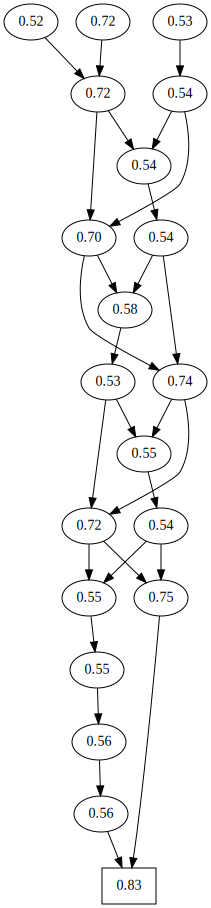

In [305]:
uniques = []
MAXD = 7
saved = None
for root in roots:
    nVerts = None
    for depth in range(1, MAXD+1):
        vs, adj = build_graph(root, depth=depth)
        vs, adj = prune_graph(vs, adj, valid, minv=0.5)
        vs, adj = rev_graph(vs, adj)

        if nVerts == len(vs):
#         if MAXD > 2 and pv / tv < 0.4:
#             print('WARN: Majority pruned [%d]: %s' %(depth, root))
            print('WARN: # verts did not increase[%d]: %s' %(depth, root))
        else:
            if any([vert in missing for vert in vs]):
                # these aren't processed by our data dump
                continue
            for vert in vs:
                if vert not in uniques:
                    uniques.append(vert)
            with open('data/graphs/%s_n%d.json' % (root, depth-1), 'w') as fl:
                obj = [
                    vs,
                    adj,
                ]
                json.dump(obj, fl, indent=4)
            nVerts = len(vs)
            
            
#         if '103309-101547' in vs:
#             saved = vs, adj
            
            
        
# print(__vs.index('103309-101547'))
show_f(vs, adj)   

In [306]:
print(len(uniques))

707


In [233]:
with open('data/top_allstops_2.json', 'w') as fl:
    json.dump(uniques, fl, indent=4)

In [252]:
with open('data/top_allstops_2.json') as fl:
    stops2 = json.load(fl)
with open('data/top_allstops.json') as fl:
    stops = json.load(fl)
print(len(stops), len(stops2))

328 424


In [292]:
overlap = 0
for ent in uniques:
    if ent in stops:
        overlap += 1
print(overlap)

208


In [307]:
missing = []
for ent in uniques:
    if ent not in stops:
        missing.append(ent)
print(len(missing))
for miss in missing:
    print(miss)

# missing = []
# for ent in stops:
#     if ent not in stops2:
#         missing.append(ent)
# print(len(missing))
# for rem in missing:
#     print(rem)

391
503195-500087
500087-501424
500087-804052
501419-502131
501424-504436
502131-502132
503273-804061
502132-503210
504436-501426
503210-500361
501426-501427
500361-502136
503998-503793
503793-550289
503793-553257
550289-550290
553257-503792
553257-550293
500009-505096
505096-500011
500012-500013
500100-500101
501329-501330
500013-500014
500101-500102
500101-500216
501330-501331
500014-500015
500102-500103
500216-504457
501331-501332
505284-500007
505284-500095
505284-500209
505284-501908
502044-500008
500007-500008
500095-500008
500209-500008
501908-500008
306533-303011
302945-307491
306901-303294
303294-303295
303294-303524
500370-500371
500371-500372
500372-500373
500431-500607
500607-500433
500433-500340
300608-301790
300609-301791
301790-300609
301791-301792
300611-300612
301792-301793
300612-300613
301793-301794
300613-300614
301794-301795
402510-402511
402510-402512
405079-401462
405079-803161
402511-402512
402512-401445
402512-403763
401462-401463
803161-405234
401445-401446
40

In [308]:
with open('data/top_allstops_n7.json', 'w') as fl:
    json.dump(missing, fl, indent=4)

In [298]:
n0s = glob('/home/ubuntu/datasets-aux/mta/parsed/s10*.json')
print(len(n0s))

30617


In [299]:
saved_segs = {}
for fname in n0s:
    saved_segs[fname.split('_')[1]] = True
saved_segs = list(saved_segs.keys())

print(saved_segs[0])
print(len(saved_segs))

302736-302737
1003


In [300]:
missing = []
for ent in uniques:
    if ent not in saved_segs:
        missing.append(ent)
print(len(missing))

6


In [301]:
for miss in missing:
    print(miss)

502145-550039
502145-550184
403781-405291
401738-405348
405348-405347
405347-401749


In [302]:
with open('data/top_allstops_n3.json', 'w') as fl:
    json.dump(missing, fl, indent=4)